# Independence analysis with PetIBM
---

The present notebook  contains all the simulation inputs used to conduct an independence analysis with our in-house code PetIBM.

PetIBM solves the incompressible Navier-Stokes equations using the immersed-boundary projection method of Taira and Colonius (2007).

All simulations reported in the directory were run using [PetIBM-0.1.1](https://github.com/barbagroup/PetIBM/releases/tag/0.1.1) on the university cluster.
PetIBM relies on the library PETSc (version 3.5.2) and OpenMPI-1.8.

In [1]:
import os
import sys
%matplotlib inline

from IPython.display import Image 

import snake

In [ ]:
print('Python version: {}'.format(sys.version))
print('snake version: {}'.format(snake.__version__))

Last time we ran this notebook, the output of the cell above was:
```
Python version: 2.7.12 |Anaconda 2.5.0 (64-bit)| (default, Jul  2 2016, 17:42:40) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
snake version: 0.1.2
```

---
## Table of contents of the directory:
---

* `gridIndependence/`:
    - `h0.004/`: simulation reported in our manuscript using a grid with spacing $h=0.004$ in the uniform region surrounding the bluff-body.
    - `h0.006/`: using a coarse grid with spacing $h=0.006$.

* `iterativeIndependence/`:
    - `rtol5/`: simulation reported in our manuscript using a relative tolerance of $10^{-5}$ for the velocity and Poisson iterative solvers.
    - `rtol8/`: tightening the exit criterion to a relative tolerance of $10^{-8}$ for the velocity and Poisson iterative solvers.

* `temporalIndependence/`:
    - `dt0.0004/`: simulation reported in our manuscript using a time-increment $\Delta t=4\times 10^{-4}$.
    - `dt0.0002/`: halving the time-increment to $\Delta t=2\times 10^{-4}$ to assess the temporal independence in the time-averaged force coefficients.

---
## Iterative independence
---

The numerical solution reported for PetIBM in our manuscript was computed using a relative tolerance of $10^{-5}$ as exit criterion for the both the velocity and Poisson iterative solvers.
The tolerance was used in our previous study (Krishnan et al., 2014) with cuIBM and the linear aglebra library CUSP.
In PetIBM, we use the library PETSc to iterative solve the systems.

To investigate the effect of the solver exit criterion on the solution, we decreased the relative tolerance of both solvers by three orders of magnitude and compute the solution over 80 non-dimensional time-units.

The next cell executes a Python script named `plotForceCoefficientsCompareRTol.py` located in the folder `iterativeIndependence`.
This script requires the numerical solution from two simulations whose input files are provided in the sub-folders `rtol5` and `rolt8`.
The `README` file details the procedure to run these two simulations.
However, if you do not have the numerical solution, you may skip the next cell and execute the one after to display the instantaneous force coefficients we obtained.

In [ ]:
# WARNING: execute this cell if you have the numerical solutions
script = os.path.join('iterativeIndependence',
                      'plotForceCoefficientsCompareRTol.py')
%run $script

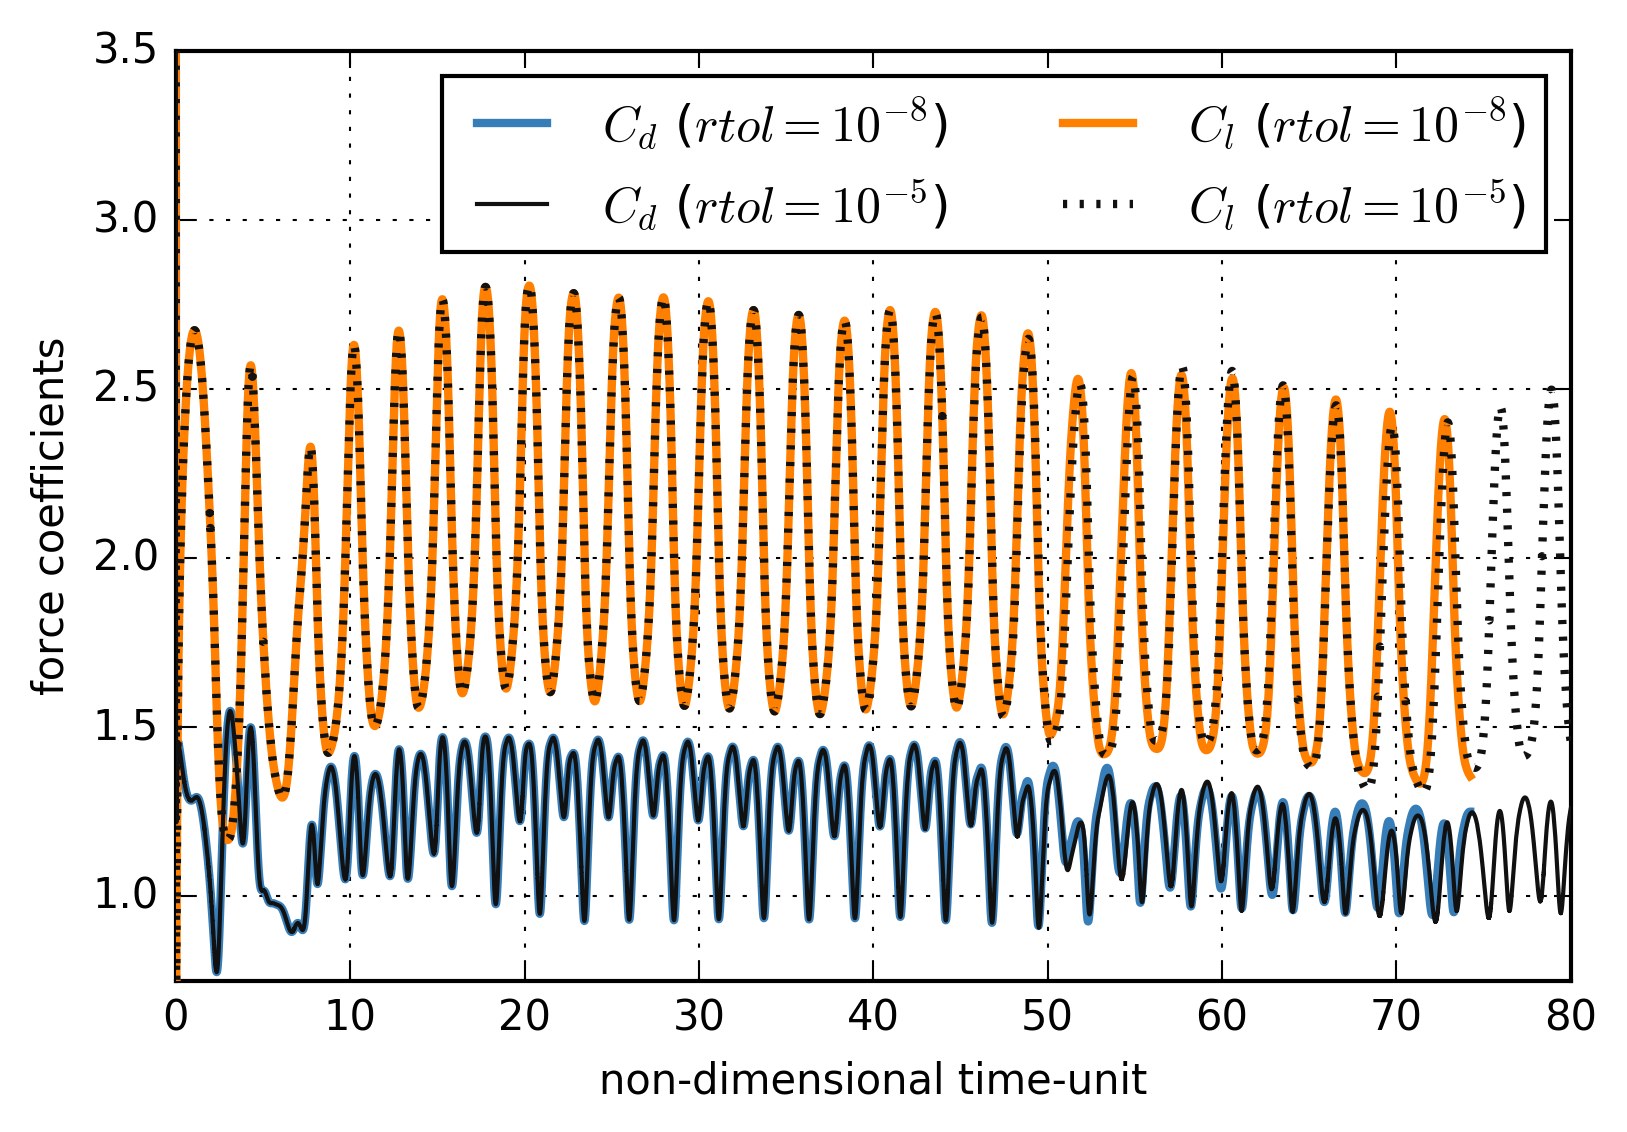

In [2]:
Image(os.path.join('iterativeIndependence',
                   'forceCoefficientsCompareRTol.png'))

When we average the force coefficients between 32 and 64 time-units (as done in Kirshnan et al., 2014), we get

| rtol | Avg. $C_d$ | $\Delta C_d / C_d$ | Avg. $C_l$ | $\Delta C_l / C_l$ |
|:-:|:-:|:-:|:-:|:-:|
| $10^{-5}$ | $1.2351$ |  | $1.9936$ |  |
| $10^{-8}$ | $1.2354$ | $+0.02\%$ | $1.9914$ | $-0.11\%$ |

The force signals from the two computations closely match each others and the relative difference in the time-averaged force coefficient is negligible.

---
## Temporal independence
---

The PetIBM runs reported in our manuscript use a time-increment $\Delta t=4\cdot 10^{-4}$ (we computed $200$k time-steps to obtain the solution up to $80$ time-units), a value that Krishnan et al. (2014) used.
Here, we also report the results when halving the time-increment.

The next cell executes a Python script name `plotForceCoefficientsCompareDt.py` located in the folder `temporalIndependence`.
The script requires the numerical solution from two simulations whose input files are provided in the sub-folders `dt0.0004` and `dt0.0002`.
A `README` is also present in the folder `temporalIndependence` with details on how to run the simulations.
In case you do not have the solutions, you can skip the next cell and jump to the one after to visualize the instantaneous force coefficients we obtained.

In [ ]:
# WARNING: execute this cell if you the numerical solutions
script = os.path.join('temporalIndependence',
                      'plotForceCoefficientsCompareDt.py')
%run $script

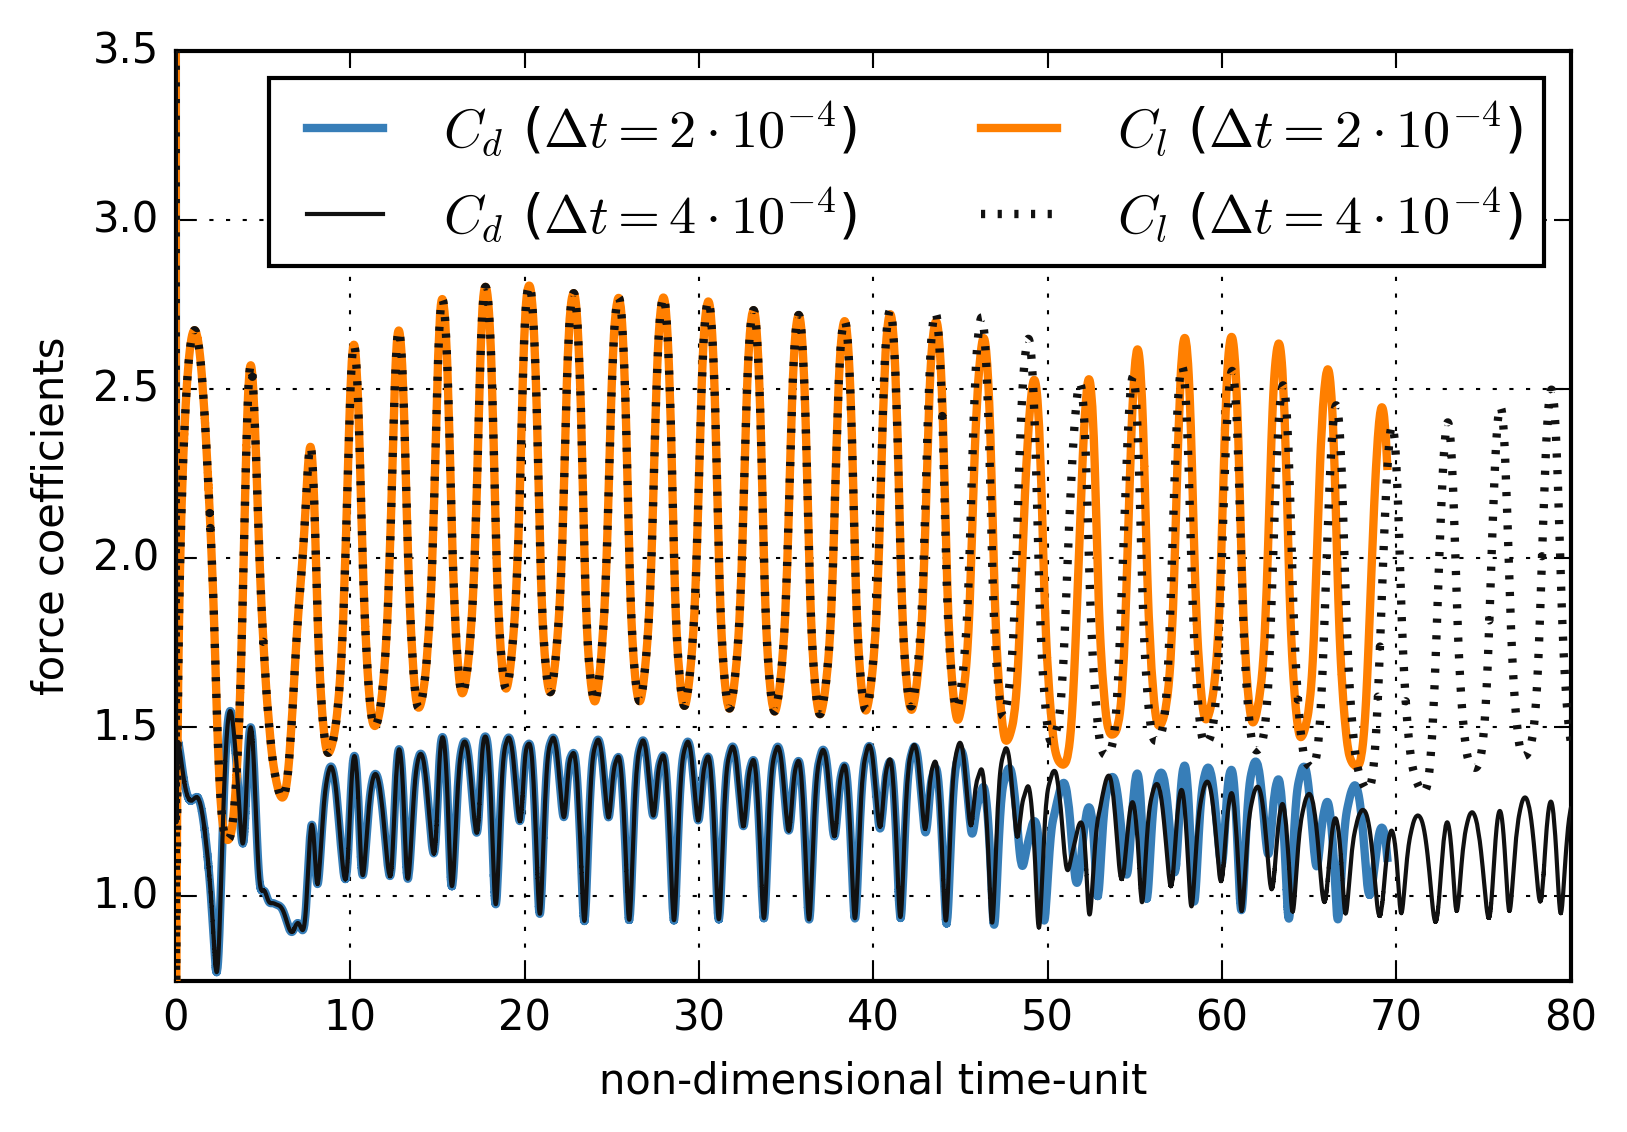

In [3]:
Image(os.path.join('temporalIndependence',
                   'forceCoefficientsCompareDt.png'))

If we average the force coefficients between 32 and 64 time-units, we get:

| $\Delta t$ | Avg. $C_d$ | $\Delta C_d / C_d$ | Avg. $C_l$ | $\Delta C_l / C_l$ |
|:-:|:-:|:-:|:-:|:-:|
| $0.0004$ | $1.2351$ |  | $1.9936$ |  |
| $0.0002$ | $1.2403$ | $+0.42\%$ | $2.0039$ | $+0.52\%$ |

The force signals from the two computations closely match each others and the relative difference in the time-averaged force coefficient is less than $1\%$.
We believe the temporal discretization error is small enough.

---
## Grid independence
---

PetIBM and cuIBM implements the same discrete formulation of the immersed-boundary projection method (Taira and Colonius, 2007).
Still, the force coefficients at Reynolds number 2000 and angle-of-attack 35 degrees differ between the two software.
This failure in replicating the lift-enhancement at angle-of-attack 35 degrees led us to replicate the grid-independence study from Krishnan et al. (2014) with cuIBM.

We computed the numerical solution on two meshes:
* one with a characteristic grid-spacing of $0.004c$ in the vicinity of the bluff-body ($c$ being the chord-length of the body),
* one with a characteristic grid-spacing $1.5$ bigger ($0.006c$).
Outside the uniform region, the gridlines are stretched to the domain boundaries with a constant ratio of $1.01$.

The next cell execute a Python script named `plotForceCoefficientsCompareMeshes.py` located in the folder `gridIndependence`.
The script requires the numerical solution on the two meshes.
We provide all necessary input files to re-run these simulations in the sub-folders `h0.006` and `h0.004`.
In addition, a `README` file details the procedure to run the problems.
In case, you do not have the numerical solutions, you can skip the next cell and execute directly the following one to display a figure of the instantaneous force coefficients we obtained.

In [ ]:
# WARNING: execute this cell if you the numerical solutions
script = os.path.join('gridIndependence',
                      'plotForceCoefficientsCompareMeshes.py')
%run $script

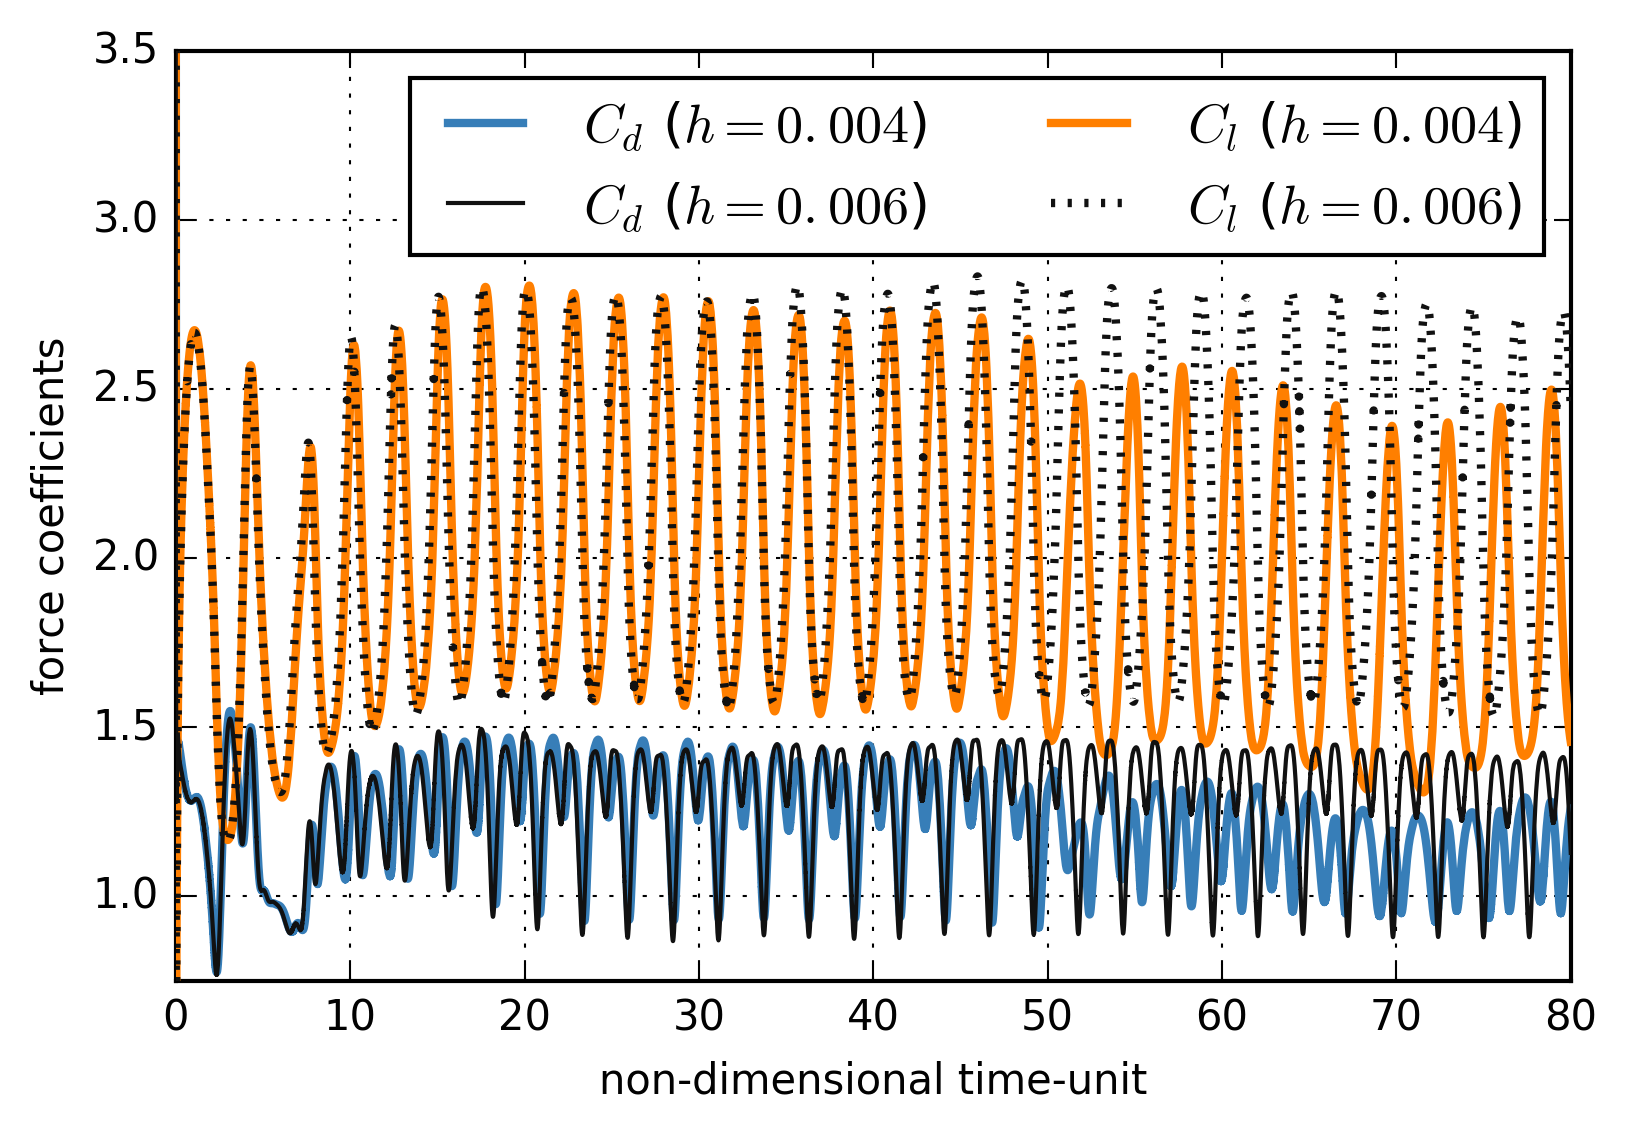

In [4]:
Image(os.path.join('gridIndependence',
                   'forceCoefficientsCompareMeshes.png'))

If we average the force coefficients between 32 and 64 time-units, we get:

| $h$ | Avg. $C_d$ | $\Delta C_d / C_d$ | Avg. $C_l$ | $\Delta C_l / C_l$ |
|:-:|:-:|:-:|:-:|:-:|
| $0.004$ | $1.2351$ |  | $1.9936$ |  |
| $0.006$ | $1.2982$ | $+5.11\%$ | $2.1511$ | $+7.90\%$ |

Interestingly, the lift coefficient obtained with the coarser mesh does not exhibit a drop in the mean value, which affects the averaged value in the time-range chosen.
Obviously, if we had chosen another range (e.g., between 30 and 30 time-units), the conclusions would be different.

So far, with PetIBM, we are not able to provide evidence of grid-independence in the time-averaged lift coefficient at Reynolds number 2000 and angle-of-attack.

---
#### References:

* Krishnan, A., Socha, J. J., Vlachos, P. P., & Barba, L. A. (2014). Lift and wakes of flying snakes. Physics of Fluids (1994-present), 26(3), 031901.
* Taira, K., & Colonius, T. (2007). The immersed boundary method: a projection approach. Journal of Computational Physics, 225(2), 2118-2137.

---